# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd
import numpy as np

fraud = pd.read_csv('Fraud.csv', nrows=100000)
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
fraud.shape

(100000, 11)

### What is the distribution of the outcome? 

In [3]:
display(fraud['isFraud'].value_counts())
display(fraud['isFlaggedFraud'].value_counts())

0    99884
1      116
Name: isFraud, dtype: int64

0    100000
Name: isFlaggedFraud, dtype: int64

<AxesSubplot:>

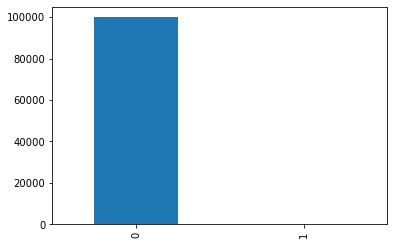

In [4]:
count_classes = pd.value_counts(fraud['isFraud'])
count_classes.plot(kind = 'bar')
#quite imbalanced 

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [5]:
fraud.dtypes
#let's check the data types first 

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
fraud.isna().sum()
#no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
fraud['step'].value_counts()
#this we might be able to use, correlation indices pending

9     37628
10    27274
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64

In [8]:
fraud['type'].value_counts()
#looks good, we'll dummify this one later on

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

In [9]:
fraud.describe()
#some columns seem correlated, so we have to dig in a bit deeper

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1356\2857577279.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


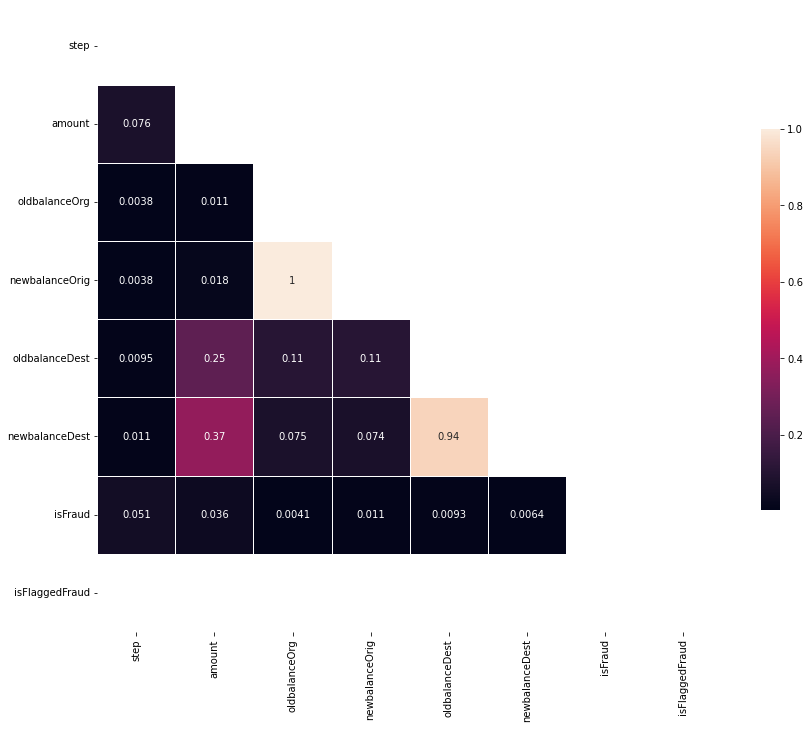

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = np.abs(fraud.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [11]:
#newBalanceOrig and oldBalanceOrg are highly correlated and oldbalanceDest and newbalanceDest too, so we'll drop one and one

In [12]:
fraud.drop(columns=['oldbalanceOrg','oldbalanceDest'], axis=1, inplace=True)

In [13]:
type_dummy = pd.get_dummies(fraud[['type']]) #one hot encoding type

In [14]:
type_dummy

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
99995,0,0,0,1,0
99996,0,0,0,1,0
99997,1,0,0,0,0
99998,0,1,0,0,0


In [15]:
fraud = fraud.join(type_dummy)

In [16]:
fraud.drop('type',axis=1,inplace=True)

In [17]:
fraud.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)

In [18]:
#let's train test split this thing  

In [19]:
X = fraud.drop(['isFraud','isFlaggedFraud'],axis=1)
y = fraud['isFraud']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Run a logisitc regression classifier and evaluate its accuracy.

In [74]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.99884

In [75]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.2
recall:  0.038461538461538464
f1:  0.06451612903225806


In [23]:
#both precision and recall are really bad, we're more interested in boosting precision in this case

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[24970,     4],
       [   25,     1]], dtype=int64)

In [181]:
#let's oversample the train set where the outcome is 1 (minority), 
#undersample when it's 0 (majority) and do a little bit of SMOTE too.
train = pd.concat([X_train, y_train],axis=1)
display(train.shape)
train.head()

(75000, 10)

,step,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
2606,1,3422.04,1800695.57,0.00,0,0,0,1,0,0
57228,9,52900.09,0.00,0.00,0,1,0,0,0,0
8382,7,16589.84,843632.12,5651.00,1,0,0,0,0,0
60281,9,92882.08,6294140.19,848234.25,1,0,0,0,0,0
48432,9,354138.65,0.00,138773.97,0,1,0,0,0,0


In [191]:
zeros = fraud[fraud['isFraud']==0]
ones = fraud[fraud['isFraud']==1]

In [192]:
display(zeros.shape)
display(ones.shape)

(99884, 11)

(116, 11)

In [193]:
from sklearn.utils import resample

In [194]:
# oversample minority
ones_oversampled = resample(ones, #<- sample from here
                   replace=True, #<- we need replacement, since we don't have enough data otherwise
                   n_samples = len(ones)*10,
                   random_state=0)

In [195]:
train_oversampled = pd.concat([zeros,ones_oversampled])
train_oversampled.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,0,1,0
4,1,11668.14,29885.86,0.0,0,0,0,0,0,1,0
5,1,7817.71,46042.29,0.0,0,0,0,0,0,1,0
6,1,7107.77,176087.23,0.0,0,0,0,0,0,1,0


In [196]:
y_train_over = train_oversampled['isFraud'].copy()
X_train_over = train_oversampled.drop(columns=['isFraud','isFlaggedFraud'],axis = 1).copy()

In [197]:
LR = LogisticRegression()
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.14285714285714285
recall:  0.038461538461538464
f1:  0.060606060606060615


In [198]:
#undersampling majority
zeros_undersampled = resample(zeros,
                     replace=False, 
                     n_samples = (len(zeros)//2), #a bit dramatic, but desperate times call for desperate measures
                     random_state=0)

In [199]:
display(zeros_undersampled.shape)
display(ones_oversampled.shape)

(49942, 11)

(1160, 11)

In [200]:
train_undersampled = pd.concat([ones_oversampled,zeros_undersampled])
train_undersampled.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5558,6,33332.86,0.0,0.00,1,0,0,0,0,0,1
5747,6,25975.86,0.0,28041.27,1,0,0,1,0,0,0
7154,6,13704.00,0.0,1658746.09,1,0,0,0,0,0,1
9285,7,262434.54,0.0,438233.86,1,0,0,1,0,0,0
9285,7,262434.54,0.0,438233.86,1,0,0,1,0,0,0


In [201]:
y_train_under = train_oversampled['isFraud'].copy()
X_train_under = train_oversampled.drop(columns=['isFraud','isFlaggedFraud'],axis = 1).copy()

In [202]:
LR = LogisticRegression()
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.14285714285714285
recall:  0.038461538461538464
f1:  0.060606060606060615


In [203]:
#not getting any better! 

In [204]:
from imblearn.over_sampling import SMOTE

In [205]:
sm = SMOTE(random_state = 123,sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_under,y_train_under)

In [206]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.002530876695687386
recall:  0.9615384615384616
f1:  0.005048465266558966


In [207]:
#recall improved a lot! but precision didn't

### Now pick a model of your choice and evaluate its accuracy.

In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_SMOTE, y_train_SMOTE)
pred = model.predict(X_test)
accuracy_score(pred, np.array(y_test))

0.99852

In [209]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4126984126984127
recall:  1.0
f1:  0.5842696629213483


### Which model worked better and how do you know?

In [1]:
# KNN: recall is good and precision improved but we might be overfitting a lot... the last logistic regression might be better 

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.